In [1]:
import os
import scanpy as sc
import anndata as ad
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

In [2]:
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

2025-03-27 23:28:47.415168: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 23:28:47.881930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-27 23:28:47.882008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-27 23:28:47.959788: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 23:28:48.110369: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 23:28:48.113121: I tensorflow/core/platform/cpu_feature_guard.cc:1

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.2 numpy==1.24.4 scipy==1.9.1 pandas==2.2.2 scikit-learn==1.4.0 statsmodels==0.13.1 igraph==0.11.8 louvain==0.7.0 pynndescent==0.5.5


In [3]:
# the following are needed to ensure that text in plt images opens as text box rather than glyphs in adobe
plt.rcParams['pdf.fonttype'] = 42  
plt.rcParams['ps.fonttype'] = 42  

plt.rcParams["figure.figsize"] = (4, 4)  

plt.rcParams["font.size"] = 14  
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["legend.fontsize"] = 14  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14 


In [4]:
base_path = "../Aligned_NucSeq/" # Folder with alignment output

# Dictionary :sample names as keys and relative paths as values
sample_names = {
    "nCN017K": "nCN017K/outs/filtered_feature_bc_matrix/",
    "nC018K": "nC018K/outs/filtered_feature_bc_matrix/",
    "nCN021K": "nCN021K/outs/filtered_feature_bc_matrix/",
    "nCN029K": "nCN029K/outs/filtered_feature_bc_matrix/",
    "nP072K": "nP072K/outs/filtered_feature_bc_matrix/",
    "nP073K": "nP073K/outs/filtered_feature_bc_matrix/",
    "nP103K": "nP103K/outs/filtered_feature_bc_matrix/",
    "nP105K": "nP105K/outs/filtered_feature_bc_matrix/",
    "nP108K": "nP108K/outs/filtered_feature_bc_matrix/",
    "nP126K": "nP126K/outs/filtered_feature_bc_matrix/",
    "nP137K": "nP137K/outs/filtered_feature_bc_matrix/",
    "nP139K": "nP139K/outs/filtered_feature_bc_matrix/",
    "nP140K": "nP140K/outs/filtered_feature_bc_matrix/",
    "nP143K": "nP143K/outs/filtered_feature_bc_matrix/",
    "nP144K": "nP144K/outs/filtered_feature_bc_matrix/"
}

samples = {key: os.path.join(base_path, value) for key, value in sample_names.items()}


In [5]:
adatas = {}

for sample_id, filename in samples.items():
    sample_adata = sc.read_10x_mtx(filename, var_names='gene_symbols', cache=True) 
    sample_adata.var_names_make_unique()  
    adatas[sample_id] = sample_adata  # Store AnnData object in dictionary

print("Loaded samples:", list(adatas.keys()))


... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
Loaded samples: ['nCN017K', 'nC018K', 'nCN021K', 'nCN029K', 'nP072K', 'nP073K', 'nP103K', 'nP105K', 

/home/zsultana/.local/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

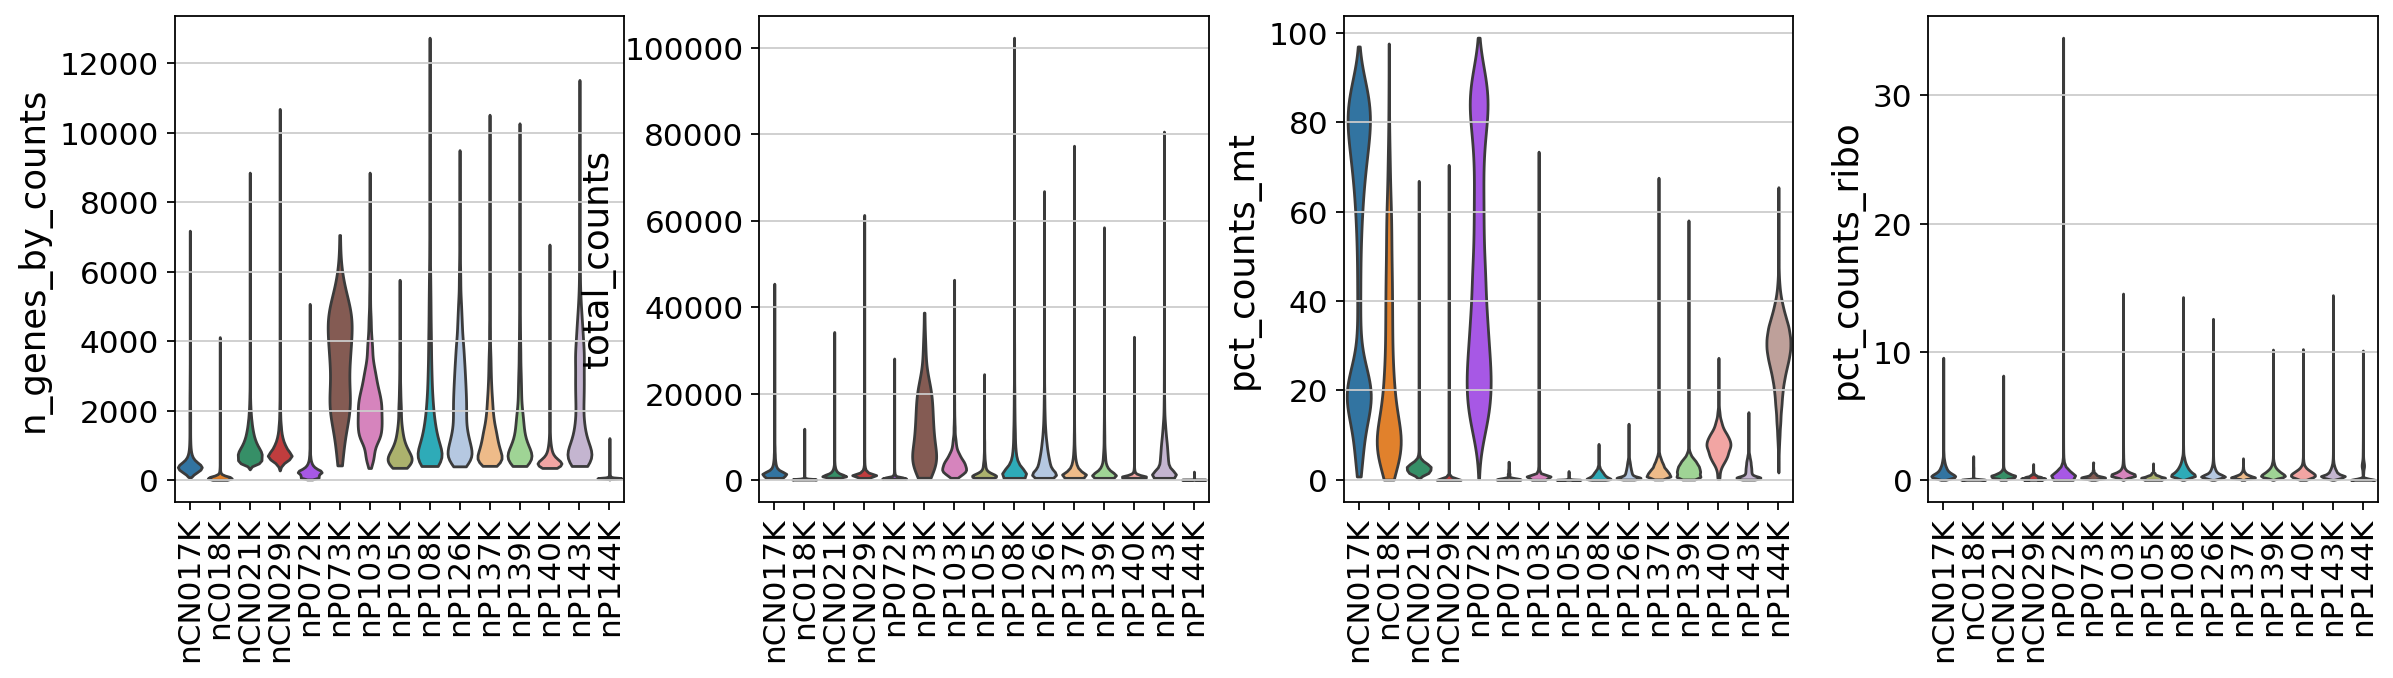

In [8]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")

adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)


In [10]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 12066 cells that have less than 50 genes expressed
filtered out 3397 genes that are detected in less than 3 cells


In [11]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()

In [12]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [14]:
adata.raw = adata.copy()

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x7fbbc8632dc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby("gene").agg(
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x7fbbc8632dc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby("gene").agg(
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nansum at 0x7fbbc8632700> is currently using SeriesGroupBy.sum. In a future version of pandas

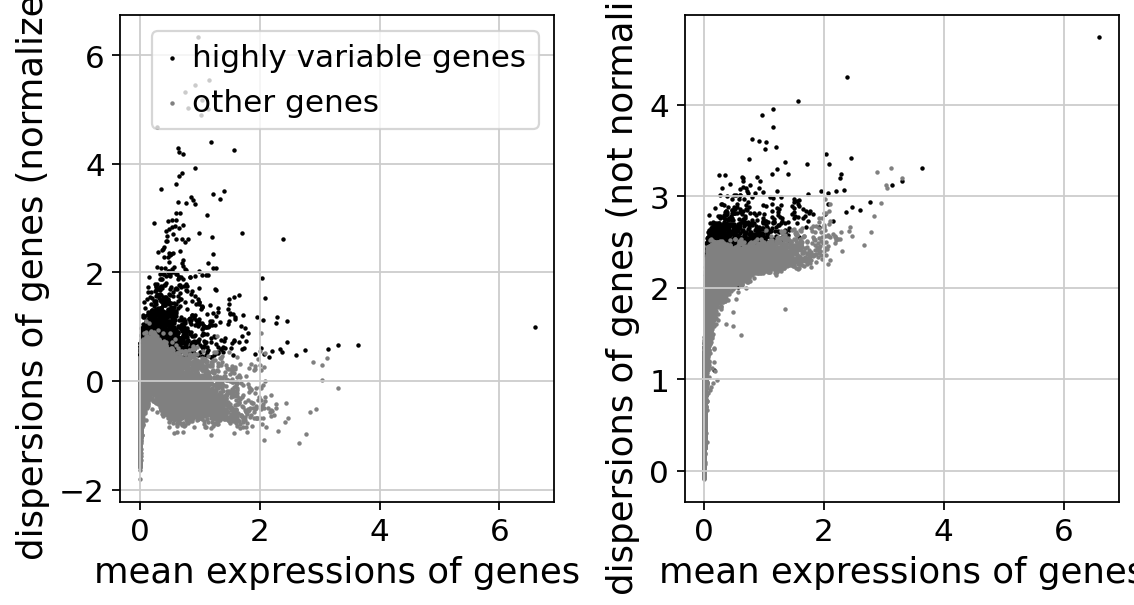

In [15]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")
sc.pl.highly_variable_genes(adata)

In [16]:
sc.pp.scale(adata) #This scales each gene to unit variance.

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [17]:
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:22)


In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [19]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:59)


/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


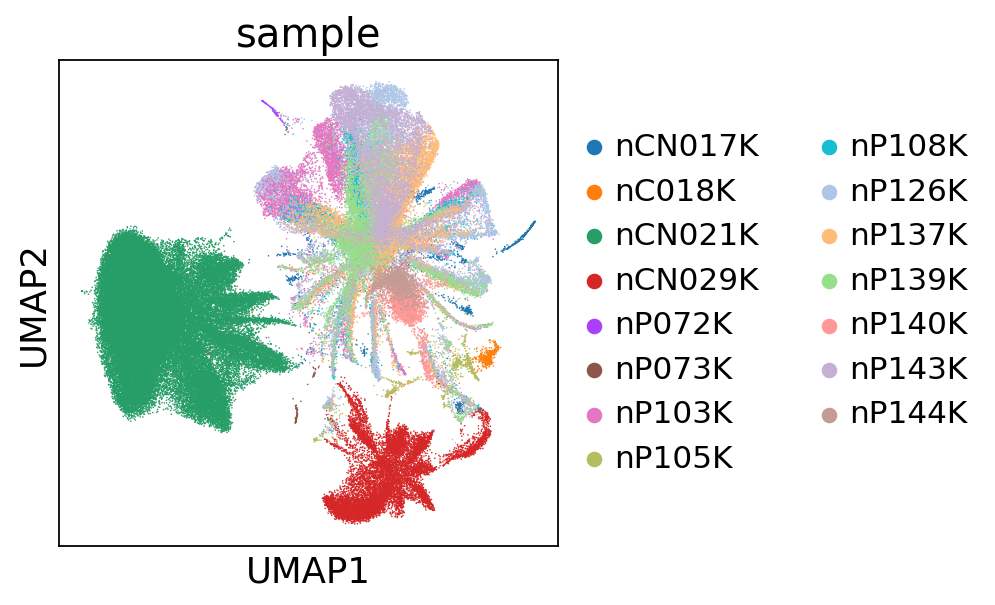

In [20]:
sc.pl.umap(
    adata,
    color= ["sample"],
    size=2,
)

In [21]:
sc.external.pp.harmony_integrate(adata, key="sample", max_iter_harmony=50)

2025-03-27 23:38:11,083 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-27 23:38:40,423 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-27 23:38:40,845 - harmonypy - INFO - Iteration 1 of 50
2025-03-27 23:39:17,402 - harmonypy - INFO - Iteration 2 of 50
2025-03-27 23:39:53,807 - harmonypy - INFO - Iteration 3 of 50
2025-03-27 23:40:30,140 - harmonypy - INFO - Iteration 4 of 50
2025-03-27 23:41:06,520 - harmonypy - INFO - Iteration 5 of 50
2025-03-27 23:41:42,876 - harmonypy - INFO - Iteration 6 of 50
2025-03-27 23:42:14,579 - harmonypy - INFO - Iteration 7 of 50
2025-03-27 23:42:40,220 - harmonypy - INFO - Iteration 8 of 50
2025-03-27 23:43:18,811 - harmonypy - INFO - Iteration 9 of 50
2025-03-27 23:43:55,867 - harmonypy - INFO - Iteration 10 of 50
2025-03-27 23:44:16,721 - harmonypy - INFO - Iteration 11 of 50
2025-03-27 23:44:32,723 - harmonypy - INFO - Iteration 12 of 50
2025-03-27 23:44:48,756 - harmonypy - INFO - Iteration 13 of

In [22]:
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:12)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:57)


/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zsultana/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zsultana/.local/lib

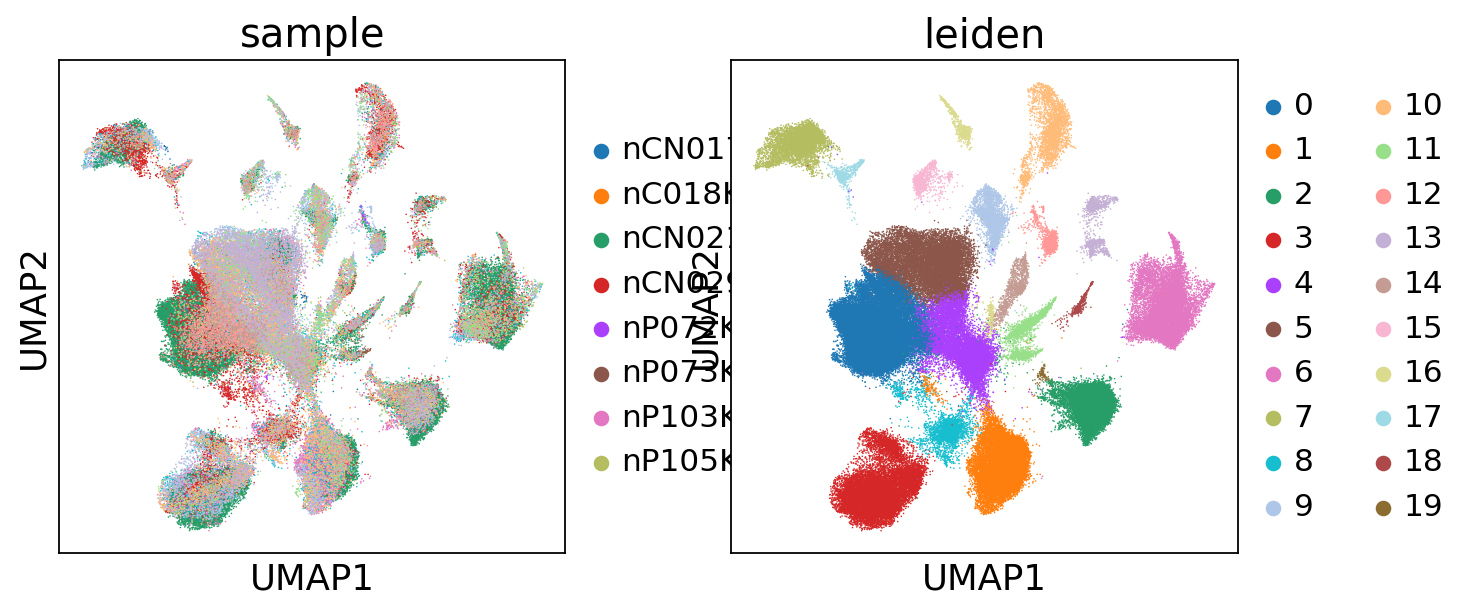

In [23]:
sc.pl.umap(
    adata,
    color= ["sample", 'leiden'],
    size=2,
)

In [26]:
adata.write("../nucseq_outs/adata_Nuc.h5ad")